In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_index = pd.read_csv('../data/economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# Drop uneccessary columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True)

In [4]:
# Check null values
df_index.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

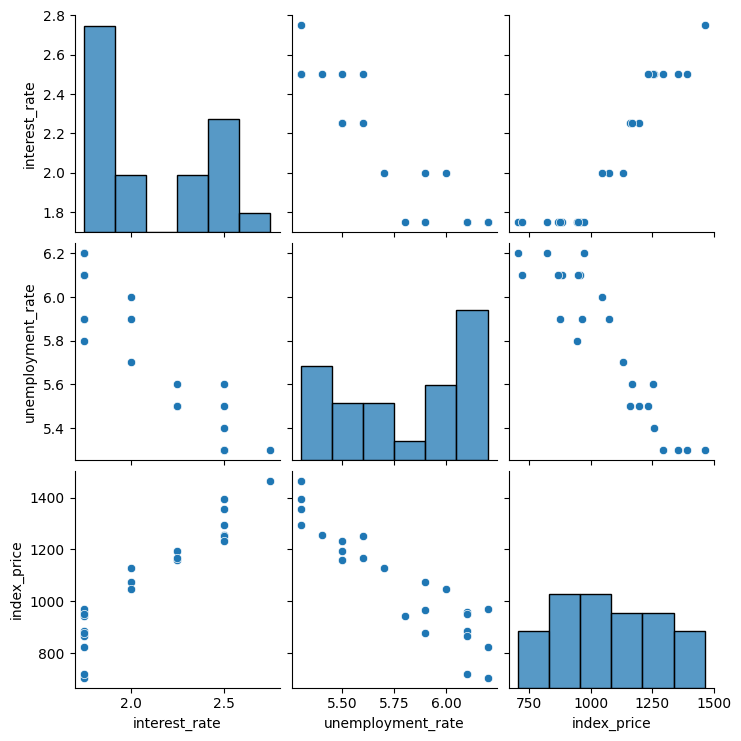

In [5]:
# Let's do some visualization
sns.pairplot(df_index)

In [6]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


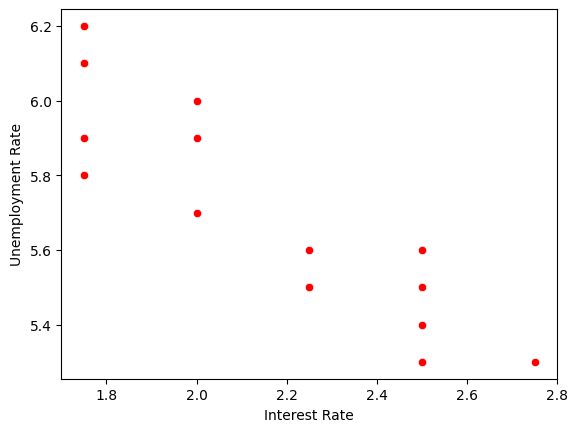

In [7]:
# Visualize the datapoints more closely
sns.scatterplot(x='interest_rate', y='unemployment_rate', data=df_index, color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [8]:
# Independent and dependent features
x = df_index[['interest_rate', 'unemployment_rate']]
y = df_index['index_price']

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

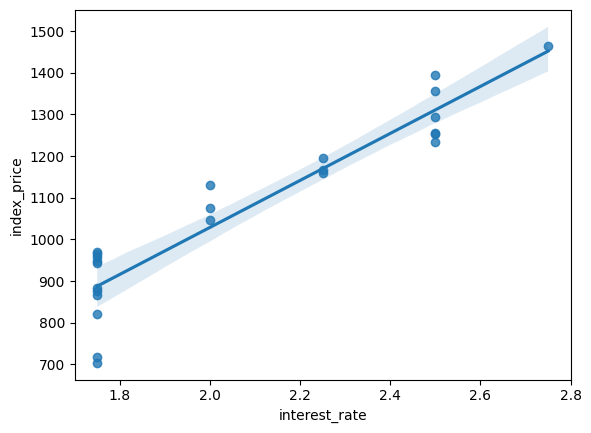

In [10]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

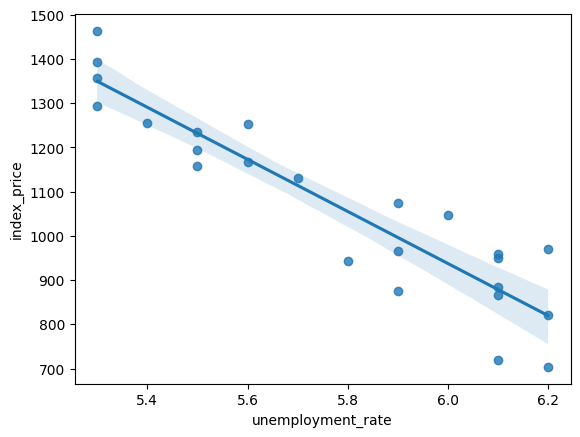

In [11]:
sns.regplot(x='unemployment_rate', y='index_price', data=df_index)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [14]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [15]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(model_lr, x_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [17]:
np.mean(val_score)

np.float64(-5914.828180162388)

In [18]:
# prediction
y_pred = model_lr.predict(x_test)

In [19]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
mse = rmse**2
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}")

MSE: 5793.762887712568
RMSE: 76.11677139574805
MAE: 59.935781523235484


In [20]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


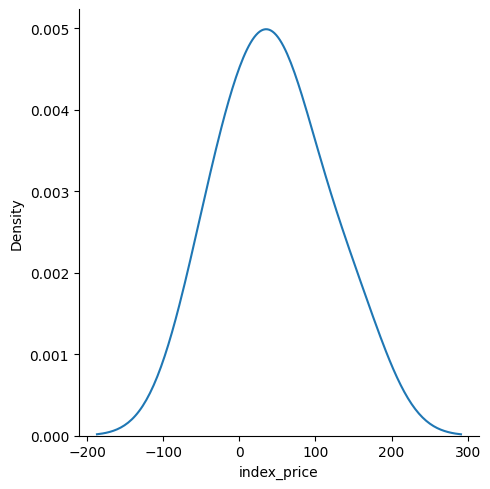

In [21]:
# Plot the residuals
sns.displot(residuals, kind='kde')

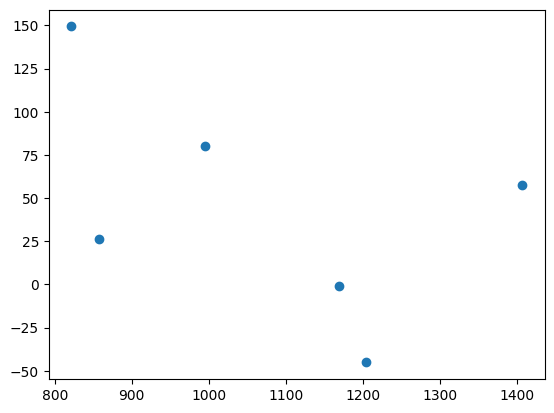

In [22]:
# Scatterplot with respect to prediction and residuals
plt.scatter(y_pred, residuals)